### Adventurework Försäljningsanalys
#### Styfte med analysen:
Denna analys för att undersöka försäljningsdata från AdventureWorks-databasen
för att identifiera mönster inom produktutbud, försäljning över tid, kundbeteenden samt
regionella skillnader.
Målet med analysen är att ge affärsinsikter som kan stödja strategiska beslut gällande sortement, marknadsföring och kundfokus. 
I denna uppgift använder vi python för visualisering och analysering. och SQL för att hämtar data från databasen.

In [128]:
import pandas as pd
import numpy as np
import pyodbc
import matplotlib.pyplot as plt
import seaborn as sns
from sqlalchemy import create_engine, text
from urllib.parse import quote_plus

plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette('Set2') 

user = 'SA'
password = quote_plus("Salamjan1")
server = 'localhost,1433'
database = 'AdventureWorks2025'
driver = quote_plus("ODBC Driver 17 for SQL server")

connection_string = (
    f"mssql+pyodbc://{user}:{password}@{server}/{database}"
    f"?driver={driver}&Encrypt=yes&TrustServerCertificate=yes"
)

engine = create_engine(connection_string)

try:
   
   with engine.connect():
        #print(conn.execute(text("SELECT")).fetchone())
        print('SQL anslutning lyckades')
except Exception as e:
    print("Kunde ej ansluta:", e)

def sql_df(sql: str):
    with engine.connect() as conn:
        return pd.read_sql(text(sql), conn)

SQL anslutning lyckades


C:\Users\zanya\AppData\Local\Temp\ipykernel_22164\4263773094.py:27: SAWarning: Unrecognized server version info '17.0.1000.7'.  Some SQL Server features may not function properly.
  with engine.connect():


#### sql_1, Visualisering1 Antal produkter per kategori
Affärsfråga: Hur många produkter finns i varje kategori?
Visualiserings krav: Vertikal stapeldiagram.
Vi kopplar samman produkt, Subkategori och huvudkategori.





Visualisering 1: Antal produkter per kategori



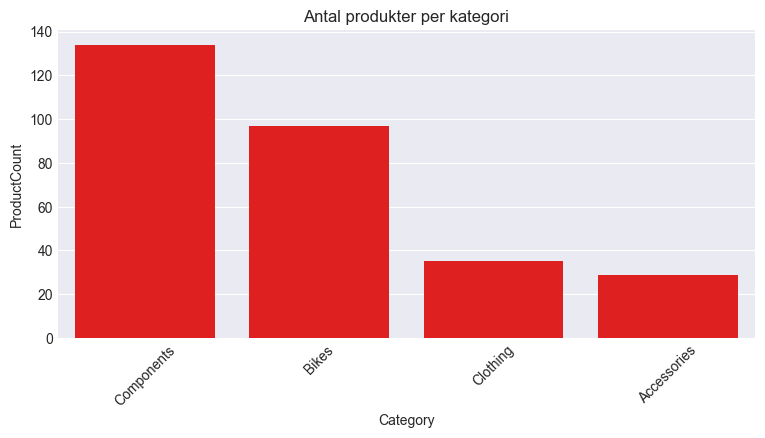

      Category  ProductCount
0   Components           134
1        Bikes            97
2     Clothing            35
3  Accessories            29
Diagramet visar kategori med flest produkter.


In [129]:
print("\n" + "" * 40 + "\n")
print("Visualisering 1: Antal produkter per kategori")
print("="*40 + "\n")
sql_1 = """
SELECT
    pc.Name AS Category,
    COUNT(DISTINCT p.ProductID) AS ProductCount
FROM Production.ProductCategory pc
JOIN Production.ProductSubcategory ps ON pc.ProductCategoryID=ps.ProductCategoryID
JOIN Production.Product p ON ps.ProductSubcategoryID = p.ProductSubcategoryID
GROUP BY pc.Name
ORDER BY ProducTCount DESC
"""
   
df1 = pd.read_sql(sql_1, engine)
df1.head()

plt.figure(figsize=(9,4))
sns.barplot(data=df1, x='Category', y='ProductCount',  color='red')
plt.title("Antal produkter per kategori")
plt.xticks(rotation=45)
plt.show()

print(df1)
print("Diagramet visar kategori med flest produkter.")


#### Visualisering 2: Antal prdukter per försäljningskategori.
Affärsfråga: Vilka produktkategorier har mest intäkter
Visualiserings krav: Horisontellt stapeldiagram.
Diagrammet ska visa högsta och minsta katagorier med exakta siffror.

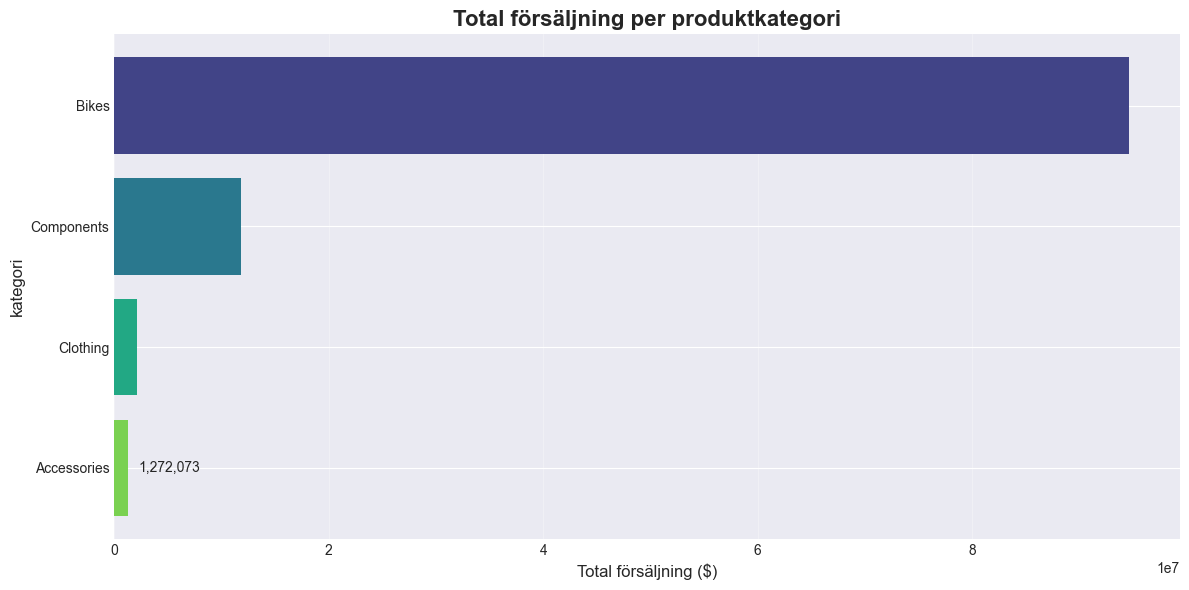

Diagramet visar Cyklar med högst total försäljning.
Diagramet visar Tillbehör med minst total försäljning.


In [130]:
sql_2 = """
SELECT
    pc.Name AS Category,
    SUM(sod.LineTotal) AS Totalsales
FROM Sales.SalesOrderDetail sod
JOIN Production.Product p
    ON sod.ProductID = p.ProductID
JOIN Production.ProductSubcategory ps
    ON p.ProductSubcategoryID = ps.ProductSubcategoryID
JOIN Production.ProductCategory pc
    ON ps.ProductCategoryID = pc.ProductCategoryID

GROUP BY pc.Name
ORDER BY Totalsales DESC
"""

df2 = pd.read_sql(sql_2, engine)
df2.head()

df2.rename(columns={'Category':'Kategori', 'Totalsales':'Total_Försäljning'}, inplace=True)
df2['Total_Försäljning'] = pd.to_numeric(df2['Total_Försäljning'])

plt.figure(figsize=(12, 6))
bars = plt.barh(df2['Kategori'], df2['Total_Försäljning'], 
                color=plt.cm.viridis(np.linspace(0.2, 0.8, len(df2))))
for bar in bars:
    width = bar.get_width()
plt.text(width + max (df2['Total_Försäljning'])*0.01, bar.get_y() + bar.get_height()/2,
             f'{width:,.0f}', ha='left', va='center', fontsize=10) 
  
plt.title('Total försäljning per produktkategori', fontsize=16, fontweight='bold')
plt.xlabel("Total försäljning ($)", fontsize=12)
plt.ylabel("kategori", fontsize=12)
plt.gca().invert_yaxis()
plt.tight_layout()
plt.grid(axis='x', alpha=0.3)
plt.show()


print("Diagramet visar Cyklar med högst total försäljning.")
print('Diagramet visar Tillbehör med minst total försäljning.')

### Visualisering 3:Försäljningstrend över tid.
Affärsfråga: Hur har försälingen utvecklats över tid?
Linjediagram. Försälinigstrend per månad. som visas tidslinje på X axeln.
Vi ska nämna högsta och lägsta trenden i linjen.

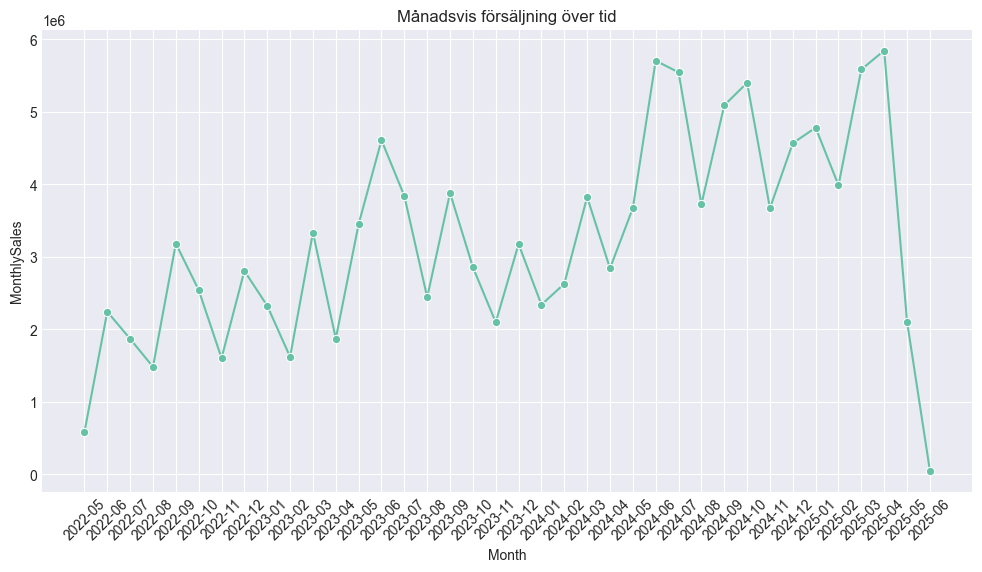

     Month  MonthlySales
0  2022-05  5.824153e+05
1  2022-06  2.244313e+06
2  2022-07  1.868508e+06
3  2022-08  1.483277e+06
4  2022-09  3.183714e+06


In [131]:
sql_3 = """
SELECT
    FORMAT(OrderDate, 'yyyy-MM') AS Month,
    SUM(TotalDue) AS MonthlySales
FROM Sales.SalesOrderHeader
GROUP BY FORMAT(OrderDate, 'yyyy-MM')
ORDER BY Month ASC;
"""
df3 = pd.read_sql(sql_3, engine)
df3.head()


plt.figure(figsize=(12,6))
sns.lineplot(data=df3, x='Month', y='MonthlySales', marker='o')
plt.title("Månadsvis försäljning över tid")
plt.xticks(rotation=45)
plt.show()
print(df3.head())


#### Visualisering 4: Försäljning och antal ordrar per år.
Affärsfråga: Hur ser total försäljning och antal årdrar per år.
Två separata stapel diagram.
Jämörelse för vilket år hade högst försäljning samt ökning av båda försälingen och antal ordrar.

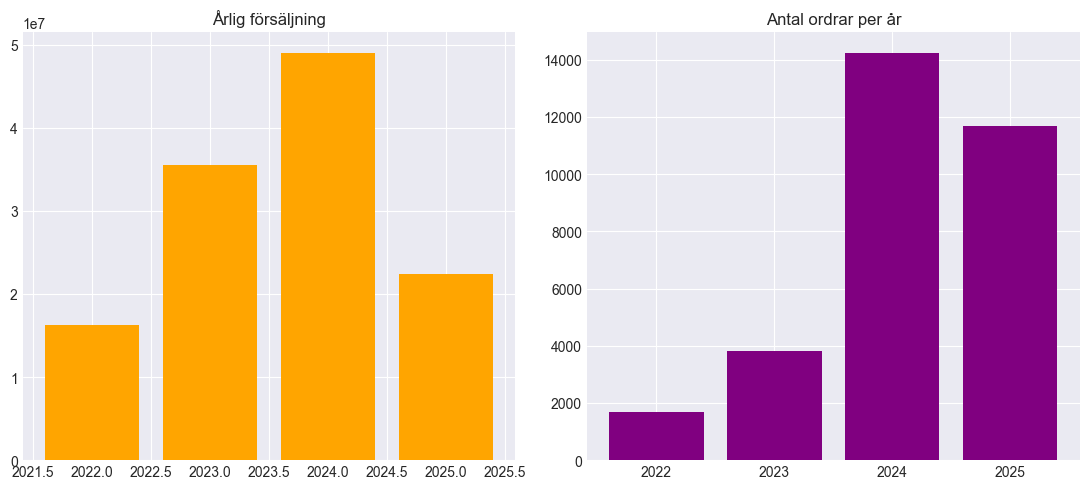

     År   Försäljning  Ordrar
0  2022  1.631669e+07    1692
1  2023  3.551471e+07    3830
2  2024  4.902049e+07   14244
3  2025  2.236490e+07   11699
2024 hade mest försäljning och ordrar hittills.


In [132]:
sql_4 = """
SELECT
    YEAR(OrderDate) as År,
    SUM(TotalDue) AS Försäljning,
    COUNT(*) as Ordrar
FROM Sales.SalesOrderHeader
GROUP BY YEAR(OrderDate)
ORDER BY År
"""
df4 = pd.read_sql(sql_4, engine)
df4.head()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(11,5))
ax1.bar(df4['År'], df4['Försäljning'], color='orange')
ax1.set_title("Årlig försäljning")
ax2.bar(df4['År'].astype(str), df4['Ordrar'], color='purple')
ax2.set_title("Antal ordrar per år")
plt.tight_layout()  
plt.show()

print(df4.head())
print("2024 hade mest försäljning och ordrar hittills.")

#### 5. Top 10 produkter
Affärsfråga: Top tio produkter. Horisontelllt stapeldiagram.
Sortera från högst till lägst
Produkt med exakt försäliningsvärde.
Vilken kategori är i topvärde.

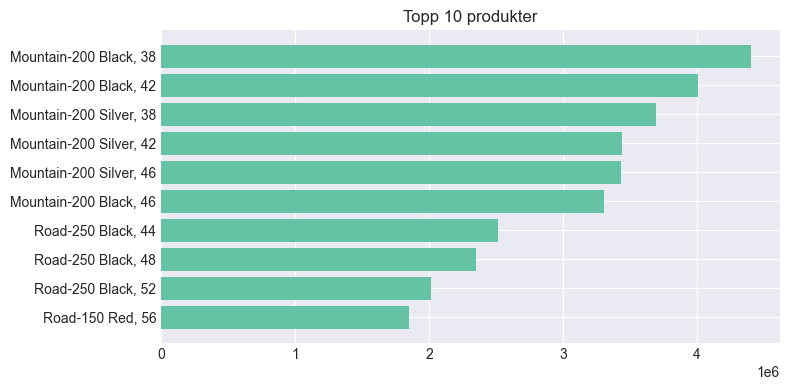

                      Name    TotalSales
0   Mountain-200 Black, 38  4.400593e+06
1   Mountain-200 Black, 42  4.009495e+06
2  Mountain-200 Silver, 38  3.693678e+06
3  Mountain-200 Silver, 42  3.438479e+06
4  Mountain-200 Silver, 46  3.434257e+06
5   Mountain-200 Black, 46  3.309673e+06
6       Road-250 Black, 44  2.516857e+06
7       Road-250 Black, 48  2.347656e+06
8       Road-250 Black, 52  2.012448e+06
9         Road-150 Red, 56  1.847819e+06
Topp 10 produkter visas i horisontell stapeldiagram.
Mountain-200 Black domierar i topp


In [133]:
sql_5 = """
SELECT TOP 10
    p.Name,
    SUM(sod.LineTotal) AS TotalSales
FROM Sales.SalesOrderDetail sod
JOIN Production.Product p ON sod.ProductID = p.ProductID
GROUP BY p.Name
ORDER BY TotalSales DESC
"""
df5 = pd.read_sql(sql_5, engine)
df5.head()


plt.figure(figsize=(8,4))
plt.barh(df5['Name'], df5['TotalSales'])
plt.title("Topp 10 produkter")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()
print(df5)
print ("Topp 10 produkter visas i horisontell stapeldiagram.")
print('Mountain-200 Black domierar i topp')

## 6. Region

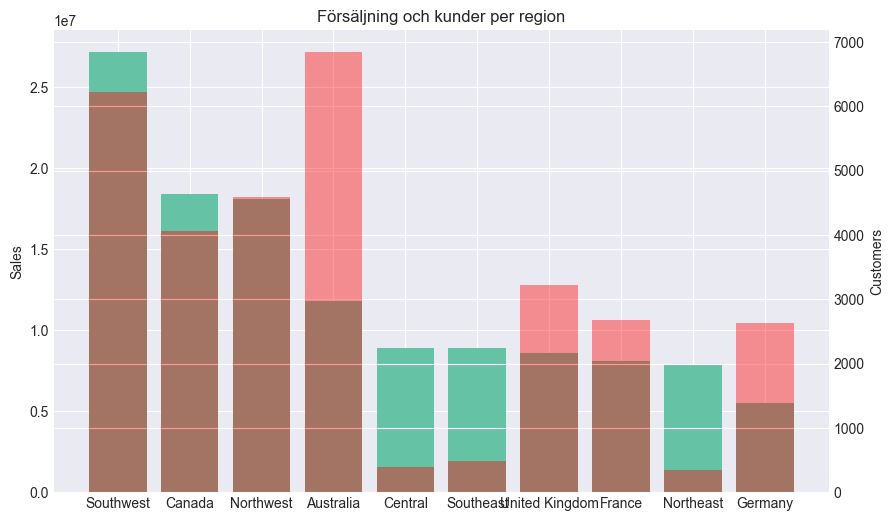

           Region         Sales  Custumers
0       Southwest  2.715059e+07       6224
1          Canada  1.839893e+07       4067
2       Northwest  1.806166e+07       4594
3       Australia  1.181438e+07       6843
4         Central  8.913299e+06        385
5       Southeast  8.884099e+06        486
6  United Kingdom  8.574049e+06       3219
7          France  8.119749e+06       2672
8       Northeast  7.820210e+06        352
9         Germany  5.479820e+06       2623
Genomsnittliga kunder i Nord Amerika har högre ordervärde än övriga regioner


In [134]:
sql_6 = """

SELECT
    st.Name AS Region,
    SUM(soh.TotalDue) AS Sales,
    COUNT(DISTINCT soh.SalesOrderID) AS Custumers
FROM Sales.SalesOrderHeader soh
    JOIN Sales.Customer c
    ON soh.CustomerID = c.CustomerID
    JOIN Sales.SalesTerritory st
    ON c.TerritoryID = st.TerritoryID
GROUP BY st.Name
ORDER BY Sales DESC
"""
df6 = pd.read_sql(sql_6, engine)
df6.head()


fig, ax1 = plt.subplots(figsize=(10,6))
df6_sorted = df6.sort_values('Sales', ascending=False)

ax1.bar(df6_sorted['Region'], df6_sorted['Sales'])
ax1.set_ylabel('Sales')

ax2 = ax1.twinx()
ax2.bar(df6_sorted['Region'], df6_sorted['Custumers'], alpha=0.4, color='red')
ax2.set_ylabel('Customers')

plt.title("Försäljning och kunder per region")
plt.xticks(rotation=45)
plt.show()

print(df6)
print('Genomsnittliga kunder i Nord Amerika har högre ordervärde än övriga regioner')

#### Visualisering 7.Genomsnitt ordervärde per region och kundtyp.
Affärsfråga: Regioner som har högst eller lägst genomsnittligt ordervärde, och skiljer det sig mellan individuella kunder och företagskunder.
Två staplar per region: en för Store, en för individual.

      Region     Kundtyp  Genomsnitt
0  Australia  Individual   1490.3849
1  Australia       Store  14415.7618
2     Canada  Individual    647.5610
3     Canada       Store  23429.7839
4    Central  Individual    368.4352

Data har20 rader
Genosnittlig ordervärde per region och kundtyp:

Enter pivot:
Kundtyp         Individual       Store
Region                                
Australia        1490.3849  14415.7618
Canada            647.5610  23429.7839
Central           368.4352  23696.7641
France           1176.1834  27649.5197
Germany          1287.5262  16414.4199
Northeast         721.8377  22845.0036
Northwest         993.8646  26172.6823
Southeast         795.5252  18913.8069
Southwest        1154.4960  27739.0649
United Kingdom   1236.5034  25671.3118


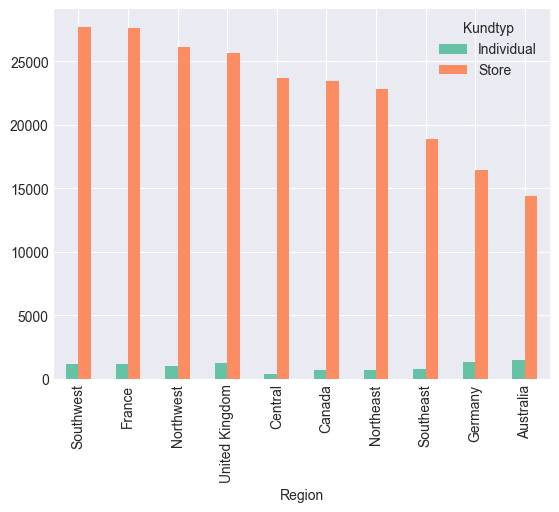

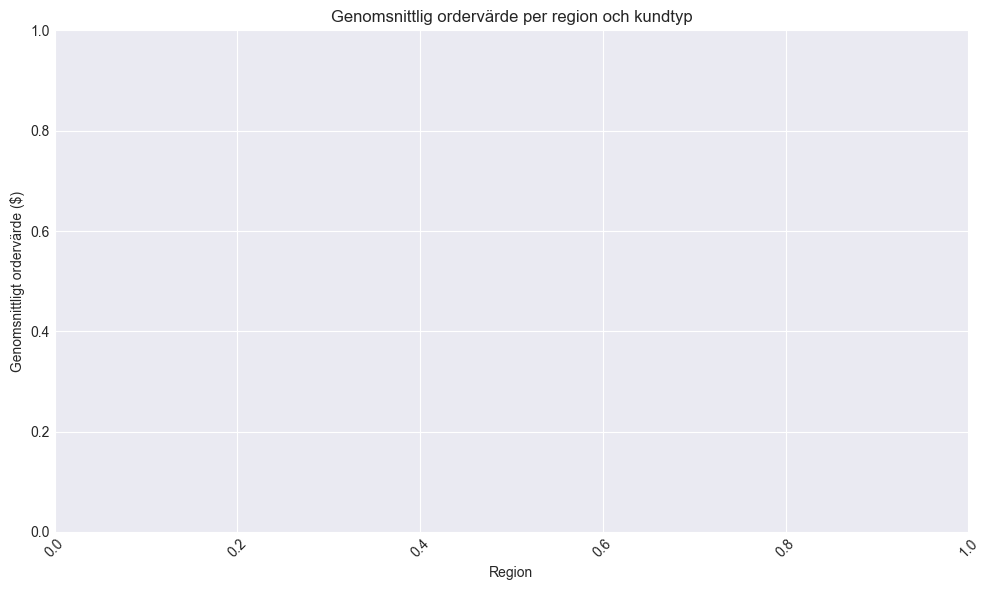

In [135]:
sql_7 = """

SELECT
    st.Name as Region,
    CASE 
        WHEN c.StoreID IS NOT NULL THEN 'Store'
        ELSE 'Individual'
    END AS Kundtyp,
    AVG(soh.TotalDue) AS Genomsnitt
FROM Sales.SalesOrderHeader soh
JOIN Sales.Customer c ON soh.CustomerID = c.CustomerID
JOIN Sales.SalesTerritory st ON soh.TerritoryID = st.TerritoryID
GROUP BY st.Name,
    CASE 
        WHEN c.StoreID IS NOT NULL THEN 'Store'
        ELSE 'Individual'
    END
ORDER BY Region
"""


df7 = pd.read_sql(sql_7, engine)
print(df7.head())
print(f'\nData har{len(df7)} rader')
print('Genosnittlig ordervärde per region och kundtyp:')

df7_pivot = df7.pivot(index='Region', columns='Kundtyp', values='Genomsnitt')
print('\nEnter pivot:')
print(df7_pivot)

df7_pivot = df7_pivot.sort_values(by='Store', ascending=False)
df7_pivot.plot(kind='bar')
plt.figure(figsize=(10,6))
plt.title("Genomsnittlig ordervärde per region och kundtyp")
plt.xlabel('Region')
plt.ylabel('Genomsnittligt ordervärde ($)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()